# Notebook Para el Análisis Exploratorio de Datos (EDA)

Libreria de Python que se utilizaron en el proceso de análisis

In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import cm 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from PIL import Image
import wordcloud
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore", message="Glyph 146 missing from current font.")

Asignación a una variable, la ruta de directorio deonde se encuentra ubicado el archivo excel. 

In [24]:
# Asignamos la ruta o ubicación deldataset a utilizar
ruta_dataset = r'../datasets/homicidios.xlsx'

El archivo excel **homicidios_hechos** consta de dos hojas de datos, se abrira la hoja de nombre **HECHOS** y sus datos estaran alamacenado en una varaible pandas homicidio_hechos 

In [25]:
# Cargamos la hoja de homicidios_hecho
# La variable ruta_dataset contiene la ruta del archivo excel
homicidios_hechos = pd.read_excel(ruta_dataset, sheet_name="HECHOS")

In [26]:
# Verificamos la lectura del archivo y observamos las columnas del dataframe
homicidios_hechos.head(2)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS


Ya la variable homicidios_hechos almacena el datasets

In [27]:
# Traducción de las columnas
columnas_hechos = ["codigo_siniestro","cantidad_victimas","fecha","anio","mes","dia","hora","franja_horaria","lugar_hecho",
                   "tipo_calle","calle","altura_siniestro","cruce_siniestro","direccion_siniestro","comuna", 
                   "geocodificacion_caba","longitud","latitud","tipo_participantes","tipo_victima","tipo_acusado"]
homicidios_hechos.columns = columnas_hechos

Luego de revisar el archivo, y entendiendo lo que se quiere, realizamos una traducción a las columnas del dataframe, para una mejor compresion del significado de las columnas 

In [28]:
# Observamos el nombre de las columnas
homicidios_hechos.tail(2)

,codigo_siniestro,cantidad_victimas,fecha,anio,mes,dia,hora,franja_horaria,lugar_hecho,tipo_calle,...,altura_siniestro,cruce_siniestro,direccion_siniestro,comuna,geocodificacion_caba,longitud,latitud,tipo_participantes,tipo_victima,tipo_acusado
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS
695,2021-0097,1,2021-11-18,2021,11,18,06:10:00,6,PADRE CARLOS MUJICA 709,CALLE,...,709.0,NaN,PADRE CARLOS MUGICA 709,1,Point (107664.16647795 104708.63962087),-58.37976155,-34.58679619,BICICLETA-AUTO,BICICLETA,AUTO


Contamos en pandas dos metodos **head()** y **tail()** para visualizar filas de un dataframe, aca lo que hicimos fue explorar los datos del dataframe utilizando tail() y ver como quedo los nombres de columnas. 

### Valoree Nulos

In [30]:
# Observemos valores nulos
homicidios_hechos.isnull().sum()

codigo_siniestro          0
cantidad_victimas         0
fecha                     0
anio                      0
mes                       0
dia                       0
hora                      0
franja_horaria            0
lugar_hecho               0
tipo_calle                0
calle                     1
altura_siniestro        567
cruce_siniestro         171
direccion_siniestro       8
comuna                    0
geocodificacion_caba      0
longitud                  0
latitud                   0
tipo_participantes        0
tipo_victima              0
tipo_acusado              0
dtype: int64

Aprovechando las bondades de Pandas, revisamos del dataframe si existen nulos y haallamos que existe una columna altura_siniestro que para nuestro estudio no va aportar mucho valor al analisis, por lo cual es la primera columna candidata a ser eliminida.

In [31]:
# Observamos variables altura que no nos aporta valor por sus valores nulos
columna_excluida = ['altura_siniestro','anio','mes','dia','franja_horaria','calle','cruce_siniestro','geocodificacion_caba']

# El cambio se realiza sobre el mismo dataframe
homicidios_hechos.drop(columns= columna_excluida, inplace= True)

Seleccionamos un conjunto de variables como : anio, mes, dia, franja_horaria, calle, cruce_siniestro, geocodificacion_caba que para nuestro estudio quisimos excluirla en un primer intento de revisar y probar que tanto valor puede aportar, estas columnas contenian valores que se pueden extraer de otra variable. 

### Valores Duplicados

In [32]:
# Verificamos la existencia de duplicado
homicidios_hechos.duplicated().sum()

0

Seguido, buscamos en el dataframe la existencia de valores duplicados, se puede observar que no existen

In [33]:
homicidios_hechos.dtypes

codigo_siniestro               object
cantidad_victimas               int64
fecha                  datetime64[ns]
hora                           object
lugar_hecho                    object
tipo_calle                     object
direccion_siniestro            object
comuna                          int64
longitud                       object
latitud                        object
tipo_participantes             object
tipo_victima                   object
tipo_acusado                   object
dtype: object

Paso importante es conocer que tipo de datos tiene nuestro dataframe, de alli sabremos cuales son columnas o variables continua o categorica 

In [34]:
# Crear un archivo con formato csv
ruta_archivo = r'../datasets./homicidios_hechos.csv'
homicidios_hechos.to_csv(ruta_archivo, sep=';', index=False, encoding='utf-8')

En este punto respaldamos nuestra estructura a un formato mas flexible, usando archivos csv.

In [35]:
# Se crea una copia para mantenr los datos originales
siniestros = homicidios_hechos

Ya para empezamso, creamos y dataframe a partir de otro y usaremos la variable siniestros para nuestro analisis 

Debemos ahora leer y cargar en un daataframe distinto lo que corresponden a los datos de la hoja **VICTIMAS**

In [36]:
# cargamos la hoja de homicidios_victimas
homicidios_victimas = pd.read_excel(ruta_dataset, sheet_name="VICTIMAS")

Creamos una instancia de la clase pandas para cargar los datos de la hoja ya mencionada

In [37]:
# Verificamos la lectura del archivo y observamos las columnas del dataframe
homicidios_victimas.head(2)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00


Observamos que ya tenemos los datos almacenado en una variable homicidios_victimas

In [38]:
# Renombrar las columnas 
columnas_victimas = ["codigo_siniestro","fecha","anio","mes","dia","rol","tipo_victima","sexo_victima","edad_victima","fecha_fallecimiento"]
homicidios_victimas.columns = columnas_victimas

Traducimos nuestros encabezado para mayor comprension

In [39]:
# Observamos el nombre de las columnas
homicidios_victimas.head(2)

,codigo_siniestro,fecha,anio,mes,dia,rol,tipo_victima,sexo_victima,edad_victima,fecha_fallecimiento
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00


Verificamos que todo este correctamente, leyendo una parte de nuestro dataframe

In [40]:
homicidios_victimas.dtypes

codigo_siniestro               object
fecha                  datetime64[ns]
anio                            int64
mes                             int64
dia                             int64
rol                            object
tipo_victima                   object
sexo_victima                   object
edad_victima                   object
fecha_fallecimiento            object
dtype: object

In [41]:
homicidios_victimas.isnull().sum()

codigo_siniestro       0
fecha                  0
anio                   0
mes                    0
dia                    0
rol                    0
tipo_victima           0
sexo_victima           0
edad_victima           0
fecha_fallecimiento    0
dtype: int64

### Valores nulos

In [42]:
# Verificamos la existencia de duplicados
homicidios_victimas.duplicated().sum()

0

No exisen valores nulos para este dataset

### Valores dupliados 

In [43]:
# Observamos variables altura que no nos aporta valor por sus valores nulos
columna_excluida = ['anio','mes','dia','tipo_victima']

# El cambio se realiza sobre el mismo dataframe
homicidios_victimas.drop(columns= columna_excluida, inplace= True)

### Eliminamos columnas lo cual no nos aporta algun valor para nuestro objetivo

In [44]:
# Se verifican los datos y las columnas
homicidios_victimas.tail(2)

,codigo_siniestro,fecha,rol,sexo_victima,edad_victima,fecha_fallecimiento
715,2021-0095,2021-12-30,CONDUCTOR,MASCULINO,27,2022-01-02 00:00:00
716,2021-0096,2021-12-15,CONDUCTOR,MASCULINO,60,2021-12-20 00:00:00


Verificamso la estructura del dataframe y sus valores

In [45]:
homicidios_victimas.dtypes

codigo_siniestro               object
fecha                  datetime64[ns]
rol                            object
sexo_victima                   object
edad_victima                   object
fecha_fallecimiento            object
dtype: object

In [46]:
# Crear un archivo con formato csv
ruta_archivo = r'../datasets/homicidios_victimas.csv'
homicidios_victimas.to_csv(ruta_archivo, sep=';', index=False, encoding='utf-8')

Creamos un respaldo de nuestro dataset que sera uilizado en nuestra base de datos en PostgreSQL, como tambien la anterior ya creada.

### En este punto se utilizaron los dataset para crear el modelo de datos utilizando un manejador de base de datos PostgreSQL.  

In [47]:
# Asignar la ruta a dos variables
ruta_siniestros = r'../datasets/siniestros.csv'
ruta_victimas = r'../datasets/victimas.csv'

### Luego de haber creado un modelo de datos, continauremos nuestro analisis para seguri conociendo todo lo concerniente a nuestros datos

In [48]:
siniestros = pd.read_csv(ruta_siniestros, sep=';')
victimas = pd.read_csv(ruta_victimas, sep=';')

Leemos nuevos dataset, tratados y generado desde nuestro PostgreSQL

In [49]:
siniestros.dtypes

cantidad_victimas       int64
fecha                  object
hora                   object
lugar_hecho            object
direccion_siniestro    object
comuna                  int64
longitud               object
latitud                object
edad_etaria            object
tipo_acusado           object
tipo_calle             object
tipo_participantes     object
dtype: object

Verificamos nuevamente los Tipo de datos de las columnas siniestros

In [50]:
victimas.dtypes

codigo_siniestro       object
fecha                  object
sexo_victima           object
edad_victima            int64
fecha_fallecimiento    object
dtype: object

Verificamos nuevamente los Tipo de datos de las columnas de victimas

# Outliers

Para obtener una visión general rápida de la distribución y detectar la presencia de outliers en el conjunto de datos, utilizamos el metodo *describe()*

In [51]:
# Buscando outliers en la variables cantidad_victimas
siniestros["cantidad_victimas"].describe()

count    696.000000
mean       1.030172
std        0.179393
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: cantidad_victimas, dtype: float64

Observemos los valores minimo = 1, media = 1.03 y maximo = 3, indican que **NO** existen una diferencias notables entre ellos, por tanto la variable por si sola no sugiere la presencia de outliers. Sin olvidar que existen reistros de siniestros con numero de victimas igual a 3

In [52]:
# Calcular media y la desviación estándar
media = victimas['edad_victima'].mean()
desviacion_estandar = victimas['edad_victima'].std()

# Definamos los límite para outliers (3σ)
limite_outlier = 3 * desviacion_estandar

# Detectemos los outliers aplicando la formula 
outliers = victimas[abs(victimas['edad_victima'] - media) > limite_outlier]

# Observemos los resultados 
print(f"Outliers detectados: {outliers}")

Outliers detectados: Empty DataFrame
Columns: [codigo_siniestro, fecha, sexo_victima, edad_victima, fecha_fallecimiento]
Index: []


### Outliers utilizando graficas de caja y  obigote para observar la distribución de datos en cuartiles

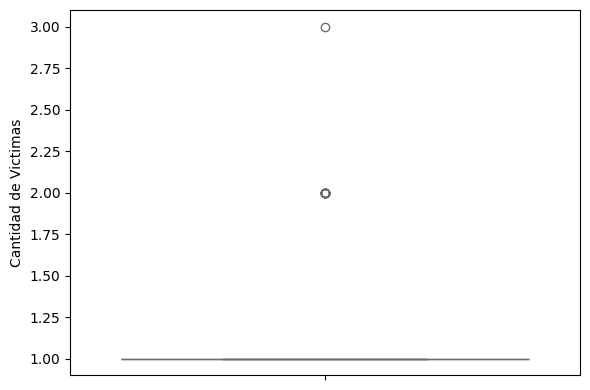

In [53]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(6, 4))

# Crear subplots para los gráficos 
plt.subplot(1, 1, 1) 
sns.boxplot(data=siniestros, y='cantidad_victimas', color = "#FA8072")
plt.ylabel('Cantidad de Victimas')
# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

Como ya se explico los Outliers son debidos que, en la mayoria de las veces el nuemro de victimas por siniestro es uno (1). 

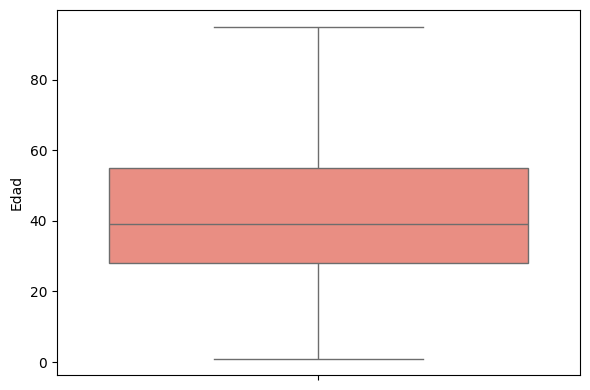

In [54]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(6, 4))

# Crear subplots para los gráficos 
plt.subplot(1, 1, 1) 
sns.boxplot(data=victimas, y='edad_victima', color = "#FA8072")
plt.ylabel('Edad')
# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

Antes dejamos claros, que esta variabel contenia un Valor **SD** que significaba **Sin Dato* y desde el lado del PostgreSQL, se tomo la decision de imputarla, del conjunto de valores numerico se claculo la media y luego este valor fue asignado, concluyendo que tenemos una variable con valores limpios y sin valores atipico como puede observarse.

## Graficas Cuantitativa

Text(0.5, 0, 'Cantidad de victima por edades')

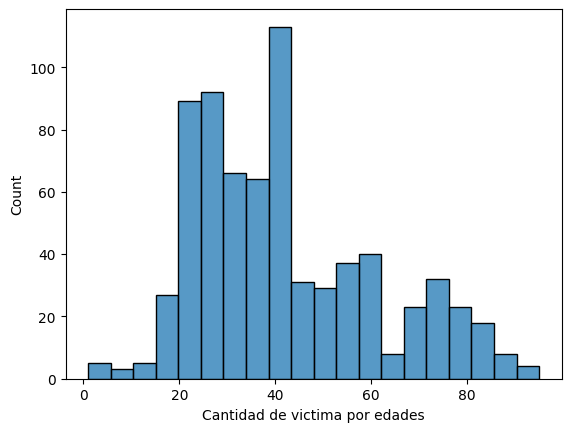

In [55]:
# Creamos un histograma para observar la distribucion de frecuencias de los valores en el conjunto de datos
g = sns.histplot(data = victimas, x = 'edad_victima', bins=20)
# Add labels
g.set_xlabel('Cantidad de victima por edades')

Podemos observar que la concentracion mas significativa la encontraremos en el punto mas alto del histograma, destacandose que las victimas estaban cerca de los 40 años. 

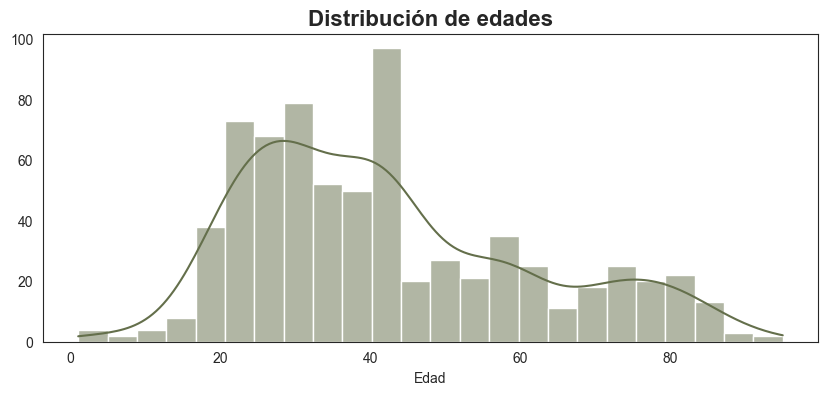

In [59]:
sns.set_style("white")
plt.figure(figsize=(10, 4))

sns.histplot(data=victimas, x='edad_victima', color='#646F4B', bins=24, kde= True)
plt.xlabel("Edad")
plt.ylabel("")
plt.title("Distribución de edades",fontweight="bold", fontsize=16)
plt.show()

### Se prepara un dataset desde el el modeleo de datos en PostgreSQL, para imprimir la siguoete gráfica

In [86]:
# Leemos el archivo preparado desde PostgreSQL 
ruta_archivo = r'../datasets./victimas_fecha.csv'
victimas_frecuencia = pd.read_csv(ruta_archivo, sep=';')

In [92]:
# Verificamos los datos
victimas_frecuencia.head(2)

,anio,mes,dia,count
0,2016,4,15,2
1,2016,3,29,1


Text(0.5, 1.0, 'Victimas por Año')

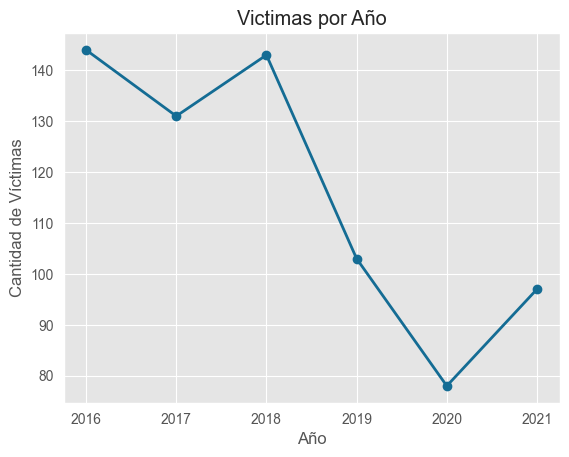

In [93]:
plt.style.use('ggplot')
victimas = victimas_frecuencia.groupby(["anio"])["count"].sum().plot(marker='o', linewidth= 2,color='#146C94')
plt.grid(visible=True)
plt.xlabel('Año')
plt.ylabel('Cantidad de Víctimas')
plt.title('Victimas por Año')                                                       
                                                                     

## Graficas Cualitativas

([<matplotlib.patches.Wedge at 0x220427bad80>,
 [Text(-0.7364047331254393, -0.8171340581755546, 'Masculino'),
  Text(0.7364046566198242, 0.8171341271227379, 'Femenino')],
 [Text(-0.4016753089775123, -0.4457094862775752, '76.7%'),
  Text(0.4016752672471768, 0.44570952388512974, '23.3%')])

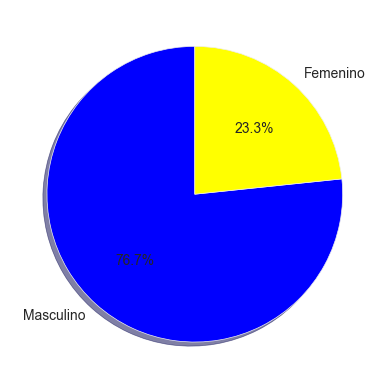

In [97]:
masculino = homicidios_victimas["sexo_victima"].value_counts()["MASCULINO"]
femenino = homicidios_victimas["sexo_victima"].value_counts()["FEMENINO"]
etiquetas = 'Masculino', 'Femenino'
sizes = [masculino, femenino]

fig, ax = plt.subplots()
ax.pie(sizes, labels=etiquetas, autopct='%1.1f%%',colors=['blue', 'yellow'],shadow=True, startangle=90)

La gráfica muestra una clara diferencia en las tasas de mortalidad por sexo. Obbservamos que el número de fallecimientos en hombres es significativamente mayor que en mujeres. Las causas de tal diferencia puediera deberse a factores  biológicos, sociales y conductuales.

<function matplotlib.pyplot.show(close=None, block=None)>

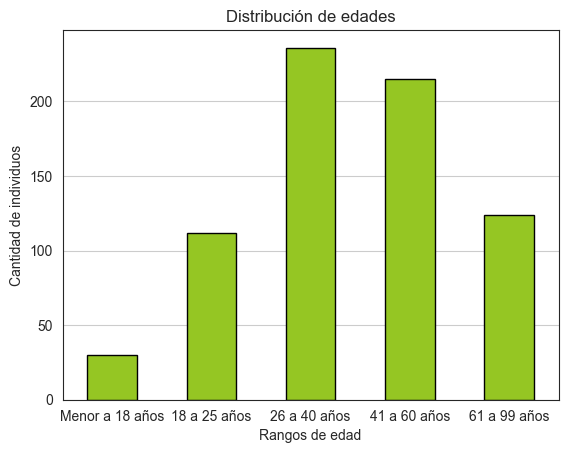

In [291]:
intervalos = [0, 18, 25, 40, 60, 99]
datos_edades = victimas[victimas["edad_victima"] != "SD"]
etiquetas = ["Menor a 18 años", "18 a 25 años", "26 a 40 años", "41 a 60 años", "61 a 99 años"]
edades_agrupadas = victimas.groupby(pd.cut(datos_edades['edad_victima'], intervalos, labels=False)).size()
edades_agrupadas.plot(kind='bar', color='#95C623', edgecolor='k')
plt.xlabel('Rangos de edad')
plt.ylabel('Cantidad de individuos')
plt.xticks(edades_agrupadas.index, etiquetas, rotation = 0)
plt.title('Distribución de edades')
plt.grid(axis='y')
plt.show

Se evidencia con esta gráfica y reforzando lo conocido que las edades de las victimas estaban cerca de los 40 años

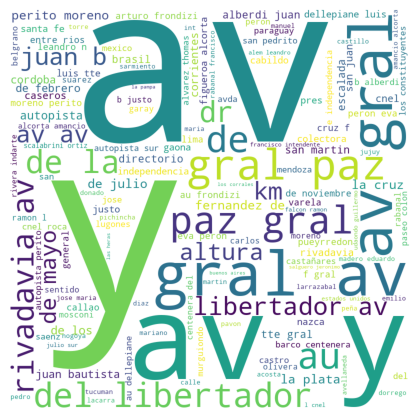

In [98]:
comment_words = ''
#stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in siniestros["lugar_hecho"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

En esta nube de palabras sugiere que la mayor cantidad de victimas se encuentra en los lugares que sobresalen (letras mas grandes)